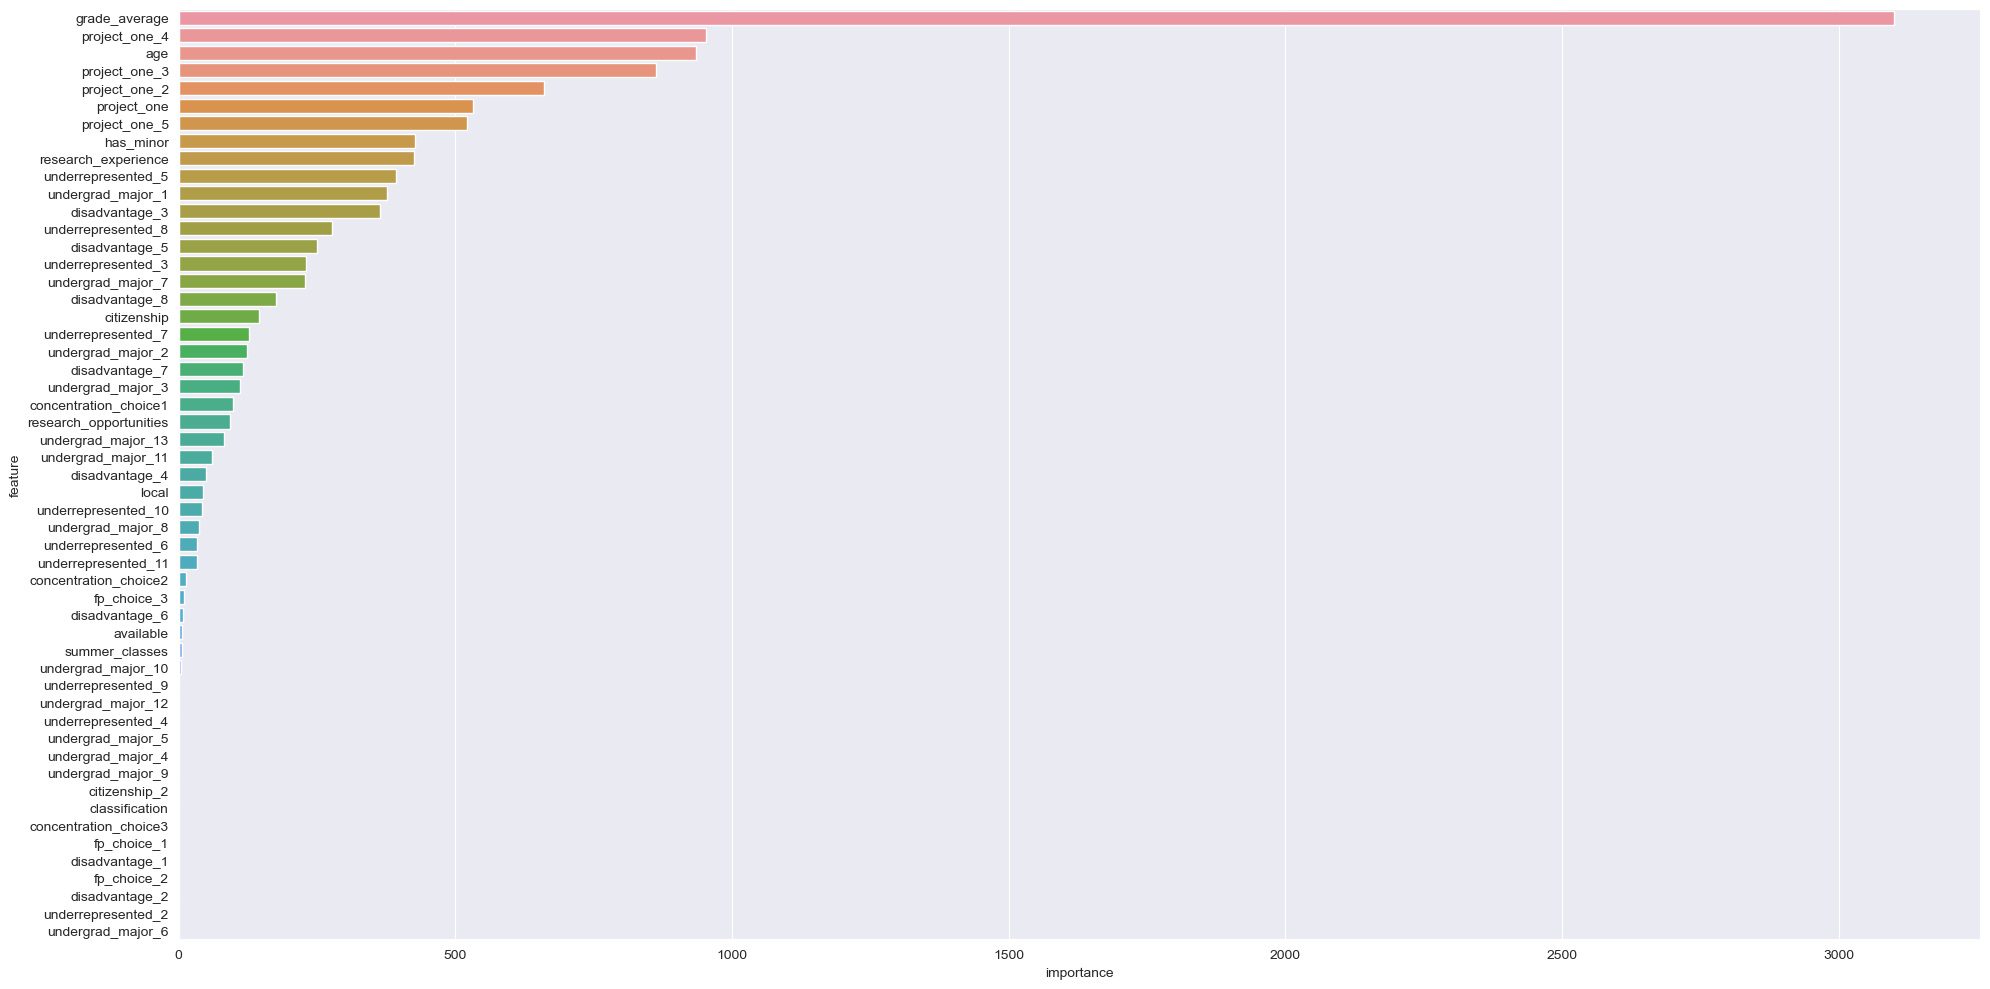

In [1]:
import pandas as pd
import warnings
from autofeatselect import FeatureSelector, AutoFeatureSelect
import matplotlib.pyplot as plt

# Read in the CSV file 
applicants_2023 = pd.read_csv('C:/Users/ksultana/Videos/Internship/2023Applicants_clean.csv')

# Assuming 'num_feats' and 'cat_feats' are numeric and categorical features, respectively
num_feats = ['age', 'grade_average']

cat_feats = ['local', 'citizenship', 'citizenship_2', 'classification', 'has_minor', 'research_opportunities',
             'available', 'summer_classes', 'concentration_choice1', 'concentration_choice2', 'concentration_choice3',
             'research_experience', 'fp_choice_1', 'fp_choice_2', 'fp_choice_3', 'project_one', 'project_one_2', 'project_one_3',
             'project_one_4', 'project_one_5', 'underrepresented_7', 'underrepresented_5', 'underrepresented_3',
             'underrepresented_8', 'underrepresented_6', 'underrepresented_10', 'underrepresented_2', 'underrepresented_11',
             'underrepresented_9', 'underrepresented_4', 'disadvantage_3', 'disadvantage_8', 'disadvantage_7',
             'disadvantage_4', 'disadvantage_2', 'disadvantage_6', 'disadvantage_5', 'disadvantage_1', 'undergrad_major_10',
             'undergrad_major_8', 'undergrad_major_1', 'undergrad_major_2', 'undergrad_major_3', 'undergrad_major_11',
             'undergrad_major_12', 'undergrad_major_13', 'undergrad_major_7', 'undergrad_major_9', 'undergrad_major_4',
             'undergrad_major_5', 'undergrad_major_6']


# Single Feature Importance Score Calculation & Plotting Results
# Initialize the FeatureSelector object for a classification task
# This object facilitates feature selection and importance analysis

"""
For a classification task, I am interested in understanding the importance of features.
The 'X_train' dataframe contains the feature columns, excluding the target variable 'selection_type'.
The 'y_train' series contains the target variable values.
'numeric_columns' and 'categorical_columns' specify the numeric and categorical features, respectively.
These are important for proper handling of different feature types during analysis.
The 'seed' parameter ensures reproducibility of results by setting a random seed for any stochastic processes.
This initialization sets the stage for further analysis, including feature importance calculations.
"""

feat_selector = FeatureSelector(modeling_type='classification',
                                X_train=applicants_2023.drop(columns=['selection_type']),
                                y_train=applicants_2023['selection_type'],
                                X_test=None,
                                y_test=None,
                                numeric_columns=num_feats,
                                categorical_columns=cat_feats,
                                seed=24)


# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

"""Train a LightGBM model to calculate feature importance and return the results as a Pandas DataFrame.It's important to 
interpret these feature importance scores as they provide insights into the contribution of each feature
towards the predictive performance of the model."""

lgbm_params = {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 400,
               'num_leaves': 30, 'random_state': 24, 'importance_type': 'gain', 'verbose': -1}
lgbm_importance_df = feat_selector.lgbm_importance(hyperparam_dict=lgbm_params,
                                                   objective=None,
                                                   return_plot=True)


selected_variables = ['selection_type','grade_average', 'project_one_4', 'age', 'project_one_3', 'project_one_2', 'project_one', 'project_one_5', 'has_minor']

# Create a new DataFrame with only the selected variables
selected_data = applicants_2023[selected_variables]

# Save the new DataFrame to a CSV file
selected_data.to_csv('C:/Users/ksultana/Videos/Internship/selected_data.csv', index=False, header=True)

